#A Python file to make the AI model of my version of Mask-or-NoMask Project

###Importing the necessasry libraries

In [1]:
from google.colab import drive
import pickle
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Conv2D, Dense, Dropout, Activation, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

###Google drive setup stuff

In [2]:
drive.mount("/gdrive", force_remount=True)
%cd /gdrive
PATH = "/gdrive/MyDrive/Mask-or-NoMask/"

Mounted at /gdrive
/gdrive


###Loading pre-saved data from **encoder.py** file

In [3]:
x_train = pickle.load(open(PATH+"pickles/X_train.pkl", "rb"))
x_test = pickle.load(open(PATH+"pickles/X_test.pkl", "rb"))
y_train = pickle.load(open(PATH+"pickles/Y_train.pkl", "rb"))
y_test = pickle.load(open(PATH+"pickles/Y_test.pkl", "rb"))

In [4]:
print(y_test[:5])

[1, 1, 1, 0, 0]


###Visualizing the loaded data

0


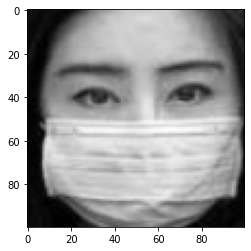

In [5]:
plt.imshow(x_train[0], cmap="gray")
print(y_train[0])

###Pasting the Enum class from encoder file

In [6]:
class Enum:
    with_mask = 0
    without_mask = 1

###Normalizing the data

[[0.0745098  0.05882353 0.05098039 ... 0.18431373 0.17254902 0.10588235]
 [0.0627451  0.05490196 0.05490196 ... 0.16078431 0.14901961 0.11372549]
 [0.05098039 0.05490196 0.05490196 ... 0.1372549  0.12156863 0.11764706]
 ...
 [0.03137255 0.03921569 0.03921569 ... 0.03529412 0.04705882 0.05490196]
 [0.03137255 0.03921569 0.04313725 ... 0.05098039 0.05490196 0.0627451 ]
 [0.03529412 0.03921569 0.03921569 ... 0.05490196 0.05490196 0.05882353]]


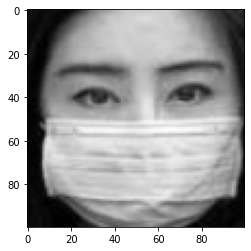

In [7]:
x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)
plt.imshow(x_train[0], cmap="gray")
print(x_train[0])

[752 728]


###Converting lists into numpy arrays

In [8]:
x_train = np.array(x_train).reshape(-1, 100, 100, 1)
y_train = np.array(y_train)

x_test = np.array(x_test).reshape(-1, 100, 100,1)
y_test = np.array(y_test)

print(y_train)

[0 0 1 ... 0 0 1]


##Building the model !!!!!!!!!!!!!!!!!

In [24]:
model = keras.Sequential()
 
# Input layer 
model.add(Conv2D(100,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Extra Dense Layer and Dense layer
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))

# final output layer
model.add(Dense(2,activation='softmax'))
 
# Adding the compilation parameters
model.compile(optimizer= "adam",
              loss= "binary_crossentropy",
              metrics= ["accuracy"]
              )

###Training the model

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=32)
model.save(PATH+"model3")

Epoch 1/20
185/185 [==============================] - 200s 1s/step - loss: 0.6980 - accuracy: 0.5547
Epoch 2/20
164/185 [=========================>....] - ETA: 22s - loss: 0.6931 - accuracy: 0.5511

In [ ]:
loaded_model = keras.models.load_model(PATH+"model2")

##Testing the model

In [ ]:
val_accuracy, val_loss = model.evaluate(x_test, y_test)
print("Loss:- ", val_loss, " Accuracy:- ", val_accuracy)